In [ ]:
# fix some imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from scipy import stats
import statsmodels.api as sm
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive')
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox as ljungbox
from matplotlib.pylab import rcParams
import warnings
import itertools
import statsmodels.api as sm
import itertools
from sklearn import metrics
import gc
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
import datetime
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = 10, 6
import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
def savepic(name):
  print("Do you wanna download the output picture")
  if input() == 'Yes':
    plt.savefig(name+".png")
    files.download(name+".png") 
  else:
    print("Thanks for typing")

# Stochastic Series
    ARIMA models are actually a combination of two, (or three if you count differencing as a model) processes that are able to generate series data. Those two models are based on an Auto Regressive (AR) process and a Moving Average process. Both AR and MA processes are stochastic processes. Stochastic means that the values come from a random probability distribution, which can be analyzed statistically but may not be predicted precisely. In other words, both processes have some uncertainty.

    

# White noise signal.

    This process is completely random, though we are able to infer some properties from this series. By making a plot of the distribution we can assume that these variables come from a single normal distribution with zero mean and unit variance. Our best guess for any new variables value would be the value 0. A better model for this process doesn’t exist as every new draw from the distribution is completely random and independent of the previous values. White noise is actually something we want to see on the residuals after we’ve defined a model. If the residuals follow a white noise pattern, we can be certain that we’ve declared all the possible variance.

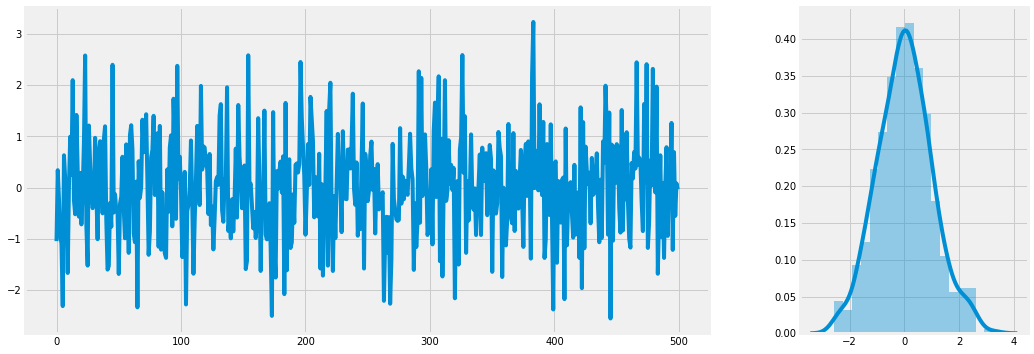

In [ ]:
# Whiten noise distribution
n = 500
fig, ax = plt.subplots(1,2, figsize=(16, 6), gridspec_kw={'width_ratios':[3, 1]})
eps = np.random.normal(size=n)
ax[0].plot(eps)
sns.distplot(eps, ax=ax[1])

# MA process

A moving average process is actually based on this white noise. It is defined as a weighted average of the previous white noise values.

Where we use'q' to denote how many time steps to include in the moving average.

In [ ]:
def lag_view(x, order):
    """
    For every value X_i create a row that lags k values: [X_i-1, X_i-2, ... X_i-k]
    """
    y = x.copy()
    # Create features by shifting the window of `order` size by one step.
    # This results in a 2D array [[t1, t2, t3], [t2, t3, t4], ... [t_k-2, t_k-1, t_k]]
    x = np.array([y[-(i + order):][:order] for i in range(y.shape[0])])
    
    # Reverse the array as we started at the end and remove duplicates.
    # Note that we truncate the features [order -1:] and the labels [order]
    # This is the shifting of the features with one time step compared to the labels
    x = np.stack(x)[::-1][order - 1: -1]
    y = y[order:]

    return x, y

In [ ]:
# We also truncate the input and output array so that all rows have lagging values. 
# If we call this function on an array ranging from 0 to 20, with order 5, we get the following output.
lag_view(np.arange(20), 5)[0]

array([[ 0,  1,  2,  3,  4],
       [ 1,  2,  3,  4,  5],
       [ 2,  3,  4,  5,  6],
       [ 3,  4,  5,  6,  7],
       [ 4,  5,  6,  7,  8],
       [ 5,  6,  7,  8,  9],
       [ 6,  7,  8,  9, 10],
       [ 7,  8,  9, 10, 11],
       [ 8,  9, 10, 11, 12],
       [ 9, 10, 11, 12, 13],
       [10, 11, 12, 13, 14],
       [11, 12, 13, 14, 15],
       [12, 13, 14, 15, 16],
       [13, 14, 15, 16, 17],
       [14, 15, 16, 17, 18]])

In [ ]:
def ma_process(eps, theta):
    """
    Creates an MA(q) process with a zero mean (mean not included in implementation).
    :param eps: (array) White noise signal.
    :param theta: (array/ list) Parameters of the process.
    """
    # reverse the order of theta as Xt, Xt-1, Xt-k in an array is Xt-k, Xt-1, Xt.
    theta = np.array([1] + list(theta))[::-1][:, None]
    eps_q, _ = lag_view(eps, len(theta))
    return eps_q @ theta

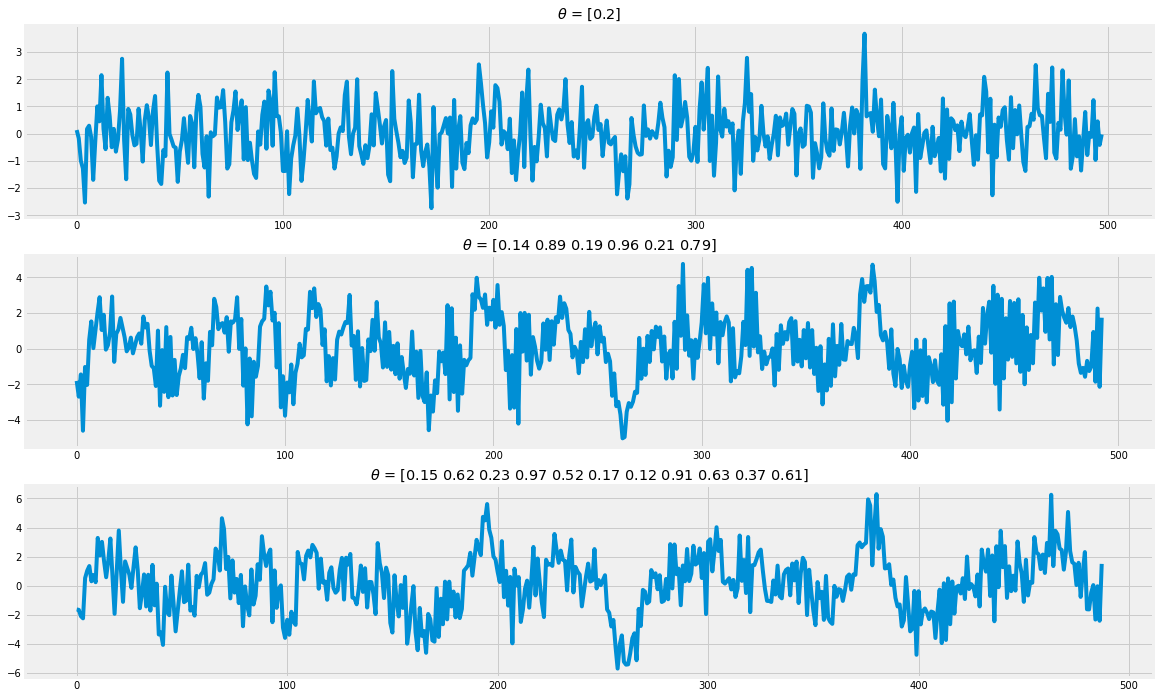

In [ ]:
# In the plots above can be seen that when the order of MA(q) increases,
# the values are longer correlated with previous values. 
fig = plt.figure(figsize=(18, 4 * 3))
a = 310
for i in range(0, 11, 5):
    a += 1
    theta = np.random.uniform(0, 1, size=i + 1)
    plt.subplot(a)
    plt.title(f'$\\theta$ = {theta.round(2)}')
    plt.plot(ma_process(eps, theta))
# The plots for 'q' (theta) for 1,6,11 values.
# Actually, because the process is a weighted average of the ϵ values until lag q, the correlation drops after this lag. 
# Based on this property we can make an educated guess on about order of an MA(q) process. 
# This is great because it is very hard to infer the order by looking at the plots directly.

In [ ]:
# Autocorrelation
# AR(1) is simply autocorrelation with 1st order or linear regression
def pearson_correlation(x, y):
    return np.mean((x - x.mean()) * (y - y.mean())) / (x.std() * y.std())

def acf(x, lag=40):
    """
    Determine autocorrelation factors.
    :param x: (array) Time series.
    :param lag: (int) Number of lags.
    """
    return np.array([1] + [pearson_correlation(x[:-i], x[i:]) for i in range(1, lag)])

In [ ]:
lag = 40
# Create an ma(1) and an ma(2) process.
ma_1 = ma_process(eps, [1])
ma_2 = ma_process(eps, [0.2, -0.3, 0.8])

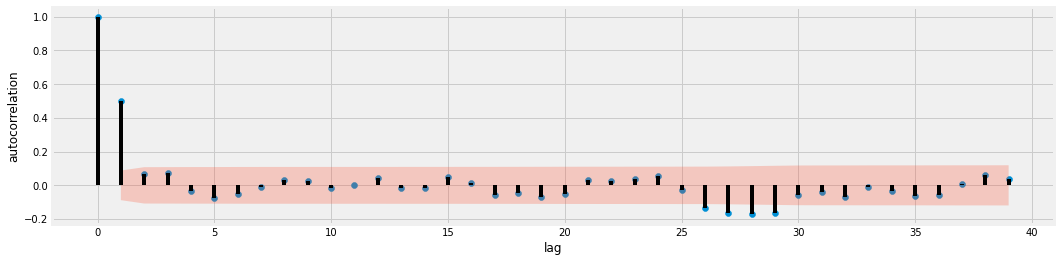

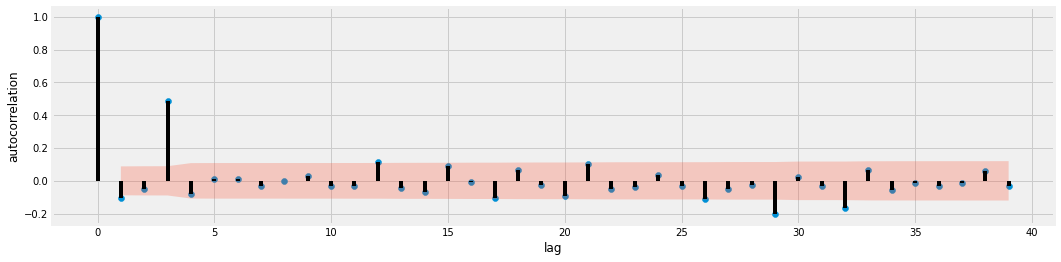

In [ ]:
def bartletts_formula(acf_array, n):
    """
    Computes the Standard Error of an acf with Bartlet's formula
    Read more at: https://en.wikipedia.org/wiki/Correlogram
    :param acf_array: (array) Containing autocorrelation factors
    :param n: (int) Length of original time series sequence.
    """
    # The first value has autocorrelation with it self. So that values is skipped
    se = np.zeros(len(acf_array) - 1)
    se[0] = 1 / np.sqrt(n)
    se[1:] = np.sqrt((1 + 2 * np.cumsum(acf_array[1:-1]**2)) / n )
    return se


def plot_acf(x, alpha=0.05, lag=40):
    """
    :param x: (array)
    :param alpha: (flt) Statistical significance for confidence interval.
    :parm lag: (int)
    """
    acf_val = acf(x, lag)
    plt.figure(figsize=(16, 4))
    plt.vlines(np.arange(lag), 0, acf_val)
    plt.scatter(np.arange(lag), acf_val, marker='o')
    plt.xlabel('lag')
    plt.ylabel('autocorrelation')
    # Determine confidence interval
    ci = stats.norm.ppf(1 - alpha / 2.) * bartletts_formula(acf_val, len(x))
    plt.fill_between(np.arange(1, ci.shape[0] + 1), -ci, ci, alpha=0.25)

for array in [ma_1, ma_2]:
    plot_acf(array)
# In both plots we can see a clear cut off in significant values. Both plots start with an autocorrelation of 1.
# This is the autocorrelation at lag 0. The second value is the autocorrelation at lag 1, the third at lag 2, etc. 
# The first plot, the cut off is after 1 lag and in the second plot the cut off is at lag 3. 
# So in our artificial data set we are able to determine the order of different MA(q) models by looking at the ACF plot

# AR process
    
    Now we are going to simulate another series called the Auto Regressive (RA) process. Again we’re going to infer the order of the process visually. This time we will be doing that with a Partial AutoCorrelation Function (PACF).


    Now ϕ are the parameters of the process and p is the order of the process. Where MA(q) is a weighted average over the error terms (white noise), AR(p) is a weighted average over the previous values of the series X(t−p). Note that this process also has a white noise variable, which makes this a stochastic series.

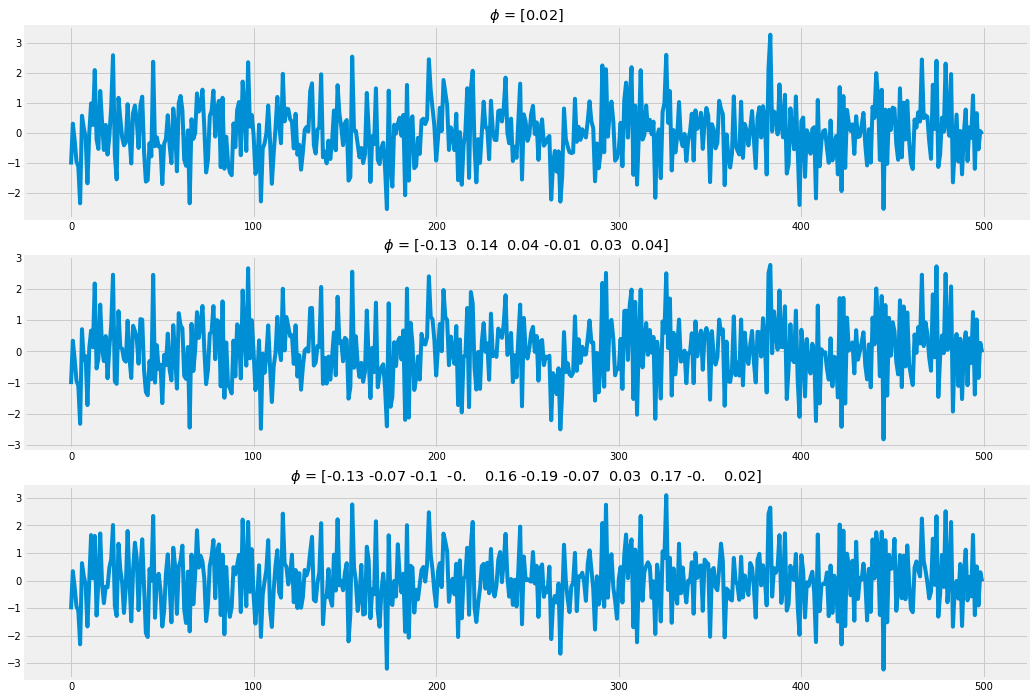

In [ ]:
def ar_process(eps, phi):
    """
    Creates a AR process with a zero mean.
    """
    # Reverse the order of phi and add a 1 for current eps_t
    phi = np.r_[1, phi][::-1] 
    ar = eps.copy()
    offset = len(phi)
    for i in range(offset, ar.shape[0]):
        ar[i - 1] = ar[i - offset: i] @ phi
    return ar

fig = plt.figure(figsize=(16, 4 * 3))
a = 310
for i in range(0, 11, 5):
    a += 1
    phi = np.random.normal(0, 0.1, size=i + 1)
    plt.subplot(a)
    plt.title(f'$\\phi$ = {phi.round(2)}')
    plt.plot(ar_process(eps, phi))

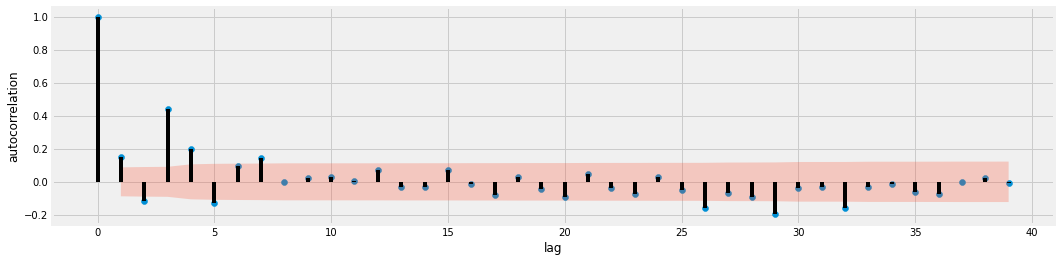

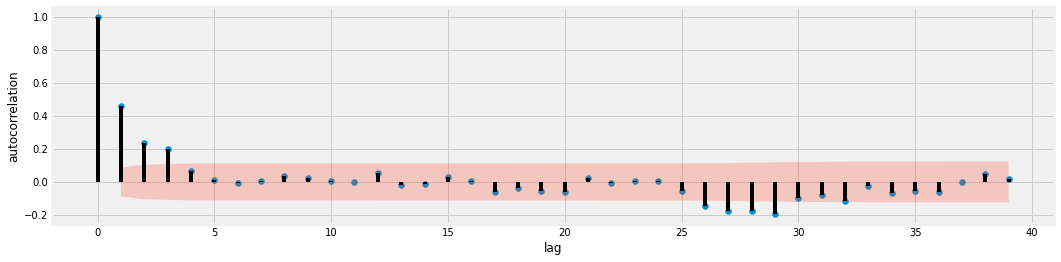

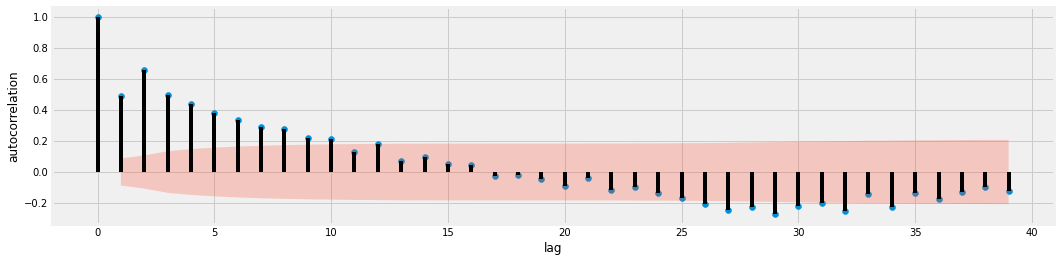

In [ ]:
plot_acf(ar_process(eps, [0.3, -0.3, 0.5]))
plot_acf(ar_process(eps, [0.5, -0.1, 0.1]))
plot_acf(ar_process(eps, [0.2, 0.5, 0.1]))

# By analyzing these plots we can tell that the ACF plot of these AR processes don’t necessarily cut off after lag p 
# In the first plot, we see that the ACF values tail off to zero, the second plot does have significant cut off at lag p
# and the third plot has a linearly decreasing autocorrelation until lag 14. For the AR(p) process, 
# the ACF clearly isn’t decisive for determining the order of the process.
# Actually, for AR processes we can use another function for inferring the order of the process.

# Partial autocorrelation

    The partial autocorrelation function shows the autocorrelation of value X(t) and X(t−k) after the correlation between X(t) with the intermediate values X(t−1)....X(t−k+1) explained.

    The partial correlation between X(t) and X(t−k) can be determined by training two linear models.

In [ ]:
# Linear model.
# We need to define a linear model inorder to compute a PACF.
def least_squares(x, y):
    return np.linalg.inv((x.T @ x)) @ (x.T @ y)

class LinearModel:
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
        self.beta = None
        self.intercept_ = None
        self.coef_ = None
    
    def _prepare_features(self, x):
        if self.fit_intercept:
            x = np.hstack((np.ones((x.shape[0], 1)), x))
        return x
    
    def fit(self, x, y):
        x = self._prepare_features(x)
        self.beta = least_squares(x, y)
        if self.fit_intercept:
            self.intercept_ = self.beta[0]
            self.coef_ = self.beta[1:]
        else:
            self.coef_ = self.beta
        
    def predict(self, x):
        x = self._prepare_features(x)
        return x @ self.beta
    
    def fit_predict(self, x, y):
        self.fit(x, y)
        return self.predict(x)


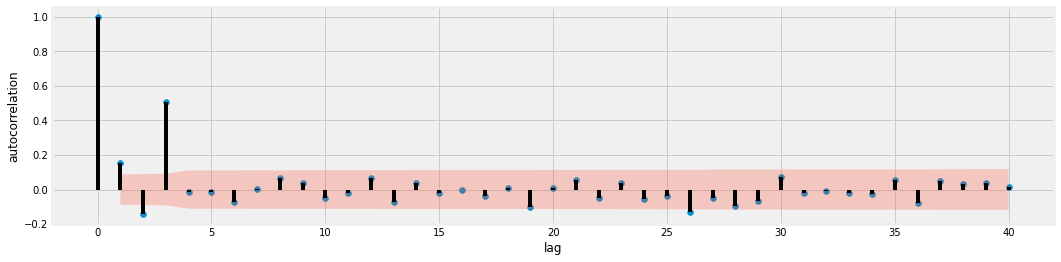

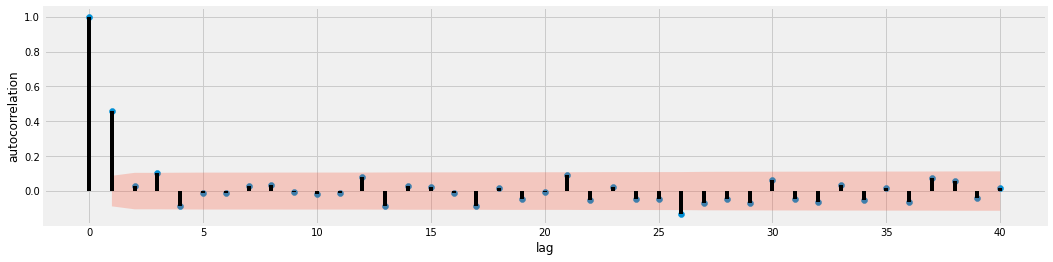

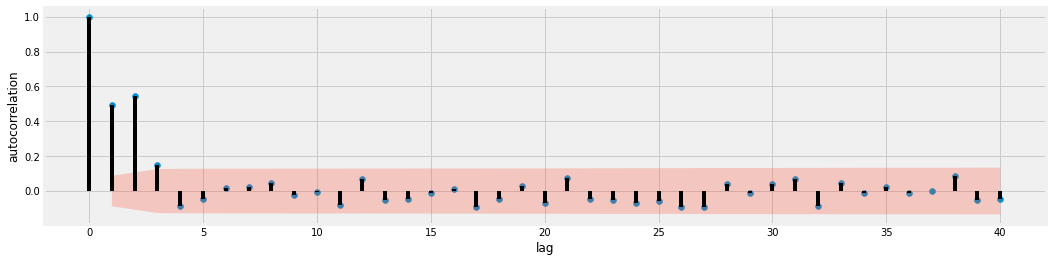

In [ ]:
def pacf(x, lag=40):
    """
    Partial autocorrelation function.
    
    pacf results in:
        [1, acf_lag_1, pacf_lag_2, pacf_lag_3]
    :param x: (array)
    :param lag: (int)
    """
    y = []
    
    # Partial auto correlation needs intermediate terms.
    # Therefore we start at index 3
    for i in range(3, lag + 2):
        backshifted = lag_view(x, i)[0]

        xt = backshifted[:, 0]
        feat = backshifted[:, 1:-1]
        xt_hat = LinearModel(fit_intercept=False).fit_predict(feat, xt)

        xt_k = backshifted[:, -1]
        xt_k_hat = LinearModel(fit_intercept=False).fit_predict(feat, xt_k)

        y.append(pearson_correlation(xt - xt_hat, xt_k - xt_k_hat))
    return np.array([1, acf(x, 2)[1]] +  y)

def plot_pacf(x, alpha=0.05, lag=40, title=None):
    """
    :param x: (array)
    :param alpha: (flt) Statistical significance for confidence interval.
    :parm lag: (int)
    """
    pacf_val = pacf(x, lag)
    plt.figure(figsize=(16, 4))
    plt.vlines(np.arange(lag + 1), 0, pacf_val)
    plt.scatter(np.arange(lag + 1), pacf_val, marker='o')
    plt.xlabel('lag')
    plt.ylabel('autocorrelation')
    
    # Determine confidence interval
    ci = stats.norm.ppf(1 - alpha / 2.) * bartletts_formula(pacf_val, len(x))
    plt.fill_between(np.arange(1, ci.shape[0] + 1), -ci, ci, alpha=0.25)

plot_pacf(ar_process(eps, [0.3, -0.3, 0.5]))
plot_pacf(ar_process(eps, [0.5, -0.1, 0.1]))
plot_pacf(ar_process(eps, [0.2, 0.5, 0.1]))

#Stationary

    An ARMA model requires the data to be stationary, which an ARIMA model does not. A stationary series has a constant mean and a constant variance over time. For the white noise, AR and MA processes we’ve defined above, this requirement holds, but for a lot of real-world data this does not. ARIMA models can work with data that isn’t stationary, but instead has got a trend. For time series that also have recurring patterns (seasonality), ARIMA models don’t work.

    When the data shows a trend, we can remove the trend by differencing time step X(t) with X(t−1). We can difference n times until the data is stationary. We can test stationarity with a Dicker Fuller test. 

In [ ]:
def difference(x, d=1):
    if d == 0:
        return x
    else:
        x = np.r_[x[0], np.diff(x)]
        return difference(x, d - 1)
    
def undo_difference(x, d=1):
    if d == 1:
        return np.cumsum(x)
    else:
        x = np.cumsum(x)
        return undo_difference(x, d - 1)

# ARIMA
    p is the order of the AR model
    q is the order of the MA model
    d is the differencing order (how often we difference the data)

    First, we will train the AR(p) model and then we will take the residuals as ϵ(t) terms. Note that this will lead to an estimation of an ARIMA model. We could estimate the error terms ϵ more accurate by iteratively training the ARIMA model whilst updating the residuals every iteration. For now, we’ll accept the quasi-white noise method. With these white noise terms, we can start modelling the full ARIMA(q, d, p) model.

In [ ]:
class ARIMA(LinearModel):
    def __init__(self, q, d, p):
        """
        An ARIMA model.
        :param q: (int) Order of the MA model.
        :param p: (int) Order of the AR model.
        :param d: (int) Number of times the data needs to be differenced.
        """
        super().__init__(True)
        self.p = p
        self.d = d
        self.q = q
        self.ar = None
        self.resid = None
        
    def prepare_features(self, x):
        if self.d > 0:
            x = difference(x, self.d)
                    
        ar_features = None
        ma_features = None
        
        # Determine the features and the epsilon terms for the MA process
        if self.q > 0:
            if self.ar is None:
                self.ar = ARIMA(0, 0, self.p)
                self.ar.fit_predict(x)
            eps = self.ar.resid
            eps[0] = 0
            
            # prepend with zeros as there are no residuals_t-k in the first X_t
            ma_features, _ = lag_view(np.r_[np.zeros(self.q), eps], self.q)
            
        # Determine the features for the AR process
        if self.p > 0:
            # prepend with zeros as there are no X_t-k in the first X_t
            ar_features = lag_view(np.r_[np.zeros(self.p), x], self.p)[0]
                                
        if ar_features is not None and ma_features is not None:
            n = min(len(ar_features), len(ma_features)) 
            ar_features = ar_features[:n]
            ma_features = ma_features[:n]
            features = np.hstack((ar_features, ma_features))
        elif ma_features is not None: 
            n = len(ma_features)
            features = ma_features[:n]
        else:
            n = len(ar_features)
            features = ar_features[:n]
        
        return features, x[:n]
    
    def fit(self, x):
        features, x = self.prepare_features(x)
        super().fit(features, x)
        return features
            
    def fit_predict(self, x): 
        """
        Fit and transform input
        :param x: (array) with time series.
        """
        features = self.fit(x)
        return self.predict(x, prepared=(features))
    
    def predict(self, x, **kwargs):
        """
        :param x: (array)
        :kwargs:
            prepared: (tpl) containing the features, eps and x
        """
        features = kwargs.get('prepared', None)
        if features is None:
            features, x = self.prepare_features(x)
        
        y = super().predict(features)
        self.resid = x - y

        return self.return_output(y)
    
    def return_output(self, x):
        if self.d > 0:
            x = undo_difference(x, self.d) 
        return x
    
    def forecast(self, x, n):
        """
        Forecast the time series.
        
        :param x: (array) Current time steps.
        :param n: (int) Number of time steps in the future.
        """
        features, x = self.prepare_features(x)
        y = super().predict(features)
        
        # Append n time steps as zeros. Because the epsilon terms are unknown
        y = np.r_[y, np.zeros(n)]
        for i in range(n):
            feat = np.r_[y[-(self.p + n) + i: -n + i], np.zeros(self.q)]
            y[x.shape[0] + i] = super().predict(feat[None, :])
        return self.return_output(y)

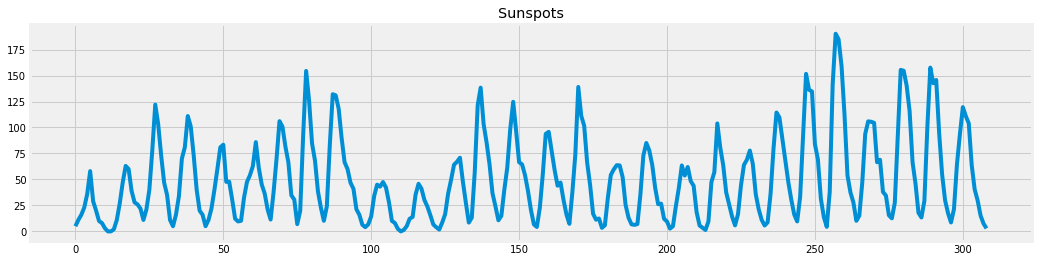

In [ ]:
data = sm.datasets.sunspots.load_pandas().data
x = data['SUNACTIVITY'].values.squeeze()

plt.figure(figsize=(16,4))
plt.title('Sunspots')
plt.plot(x)

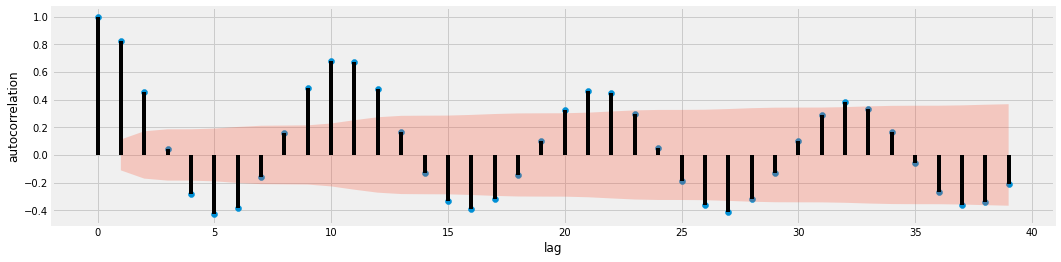

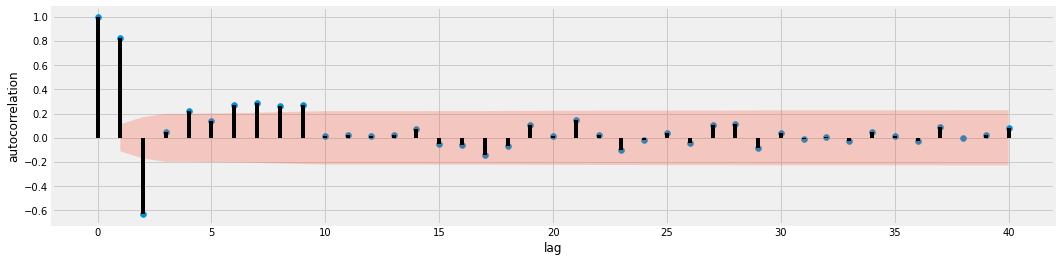

In [ ]:
plot_acf(x)
plot_pacf(x)

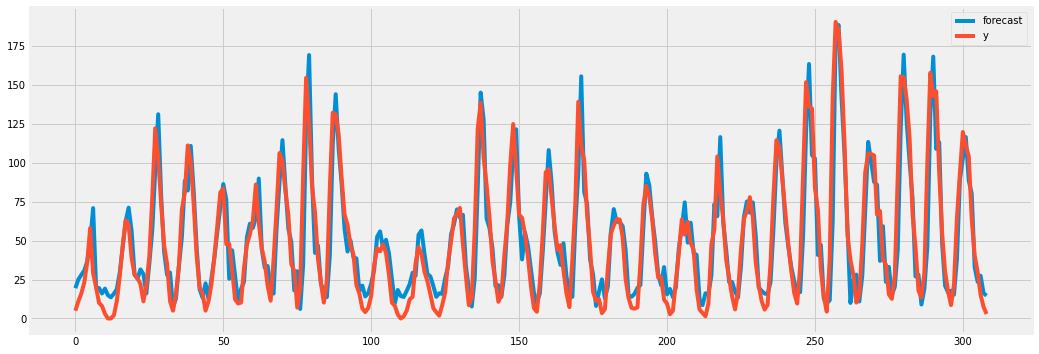

In [ ]:
q = 1
d = 0
p = 3

m = ARIMA(q, d, p)
pred = m.fit_predict(x)

plt.figure(figsize=(16, 6))
ax = plt.subplot(111)
ax.plot(pred, label='forecast')
ax.plot(x, label='y')
plt.legend()

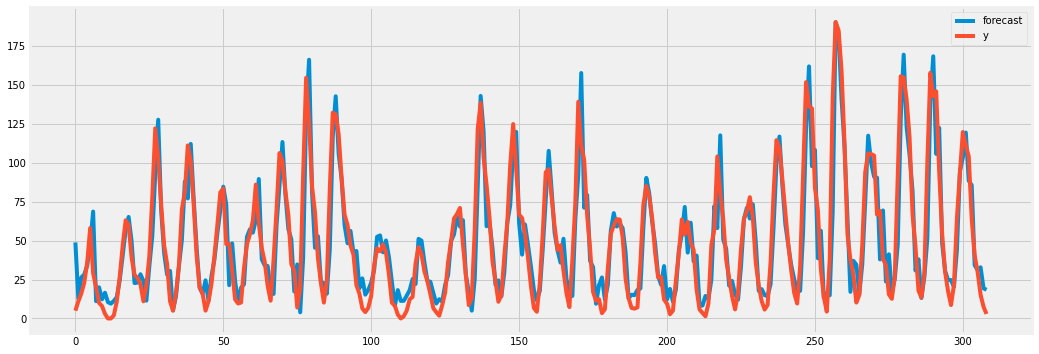

In [ ]:
results = sm.tsa.ARIMA(x, (p, d, q)).fit()

plt.figure(figsize=(16, 6))
ax = plt.subplot(111)
pred_sm = results.plot_predict(ax=ax)

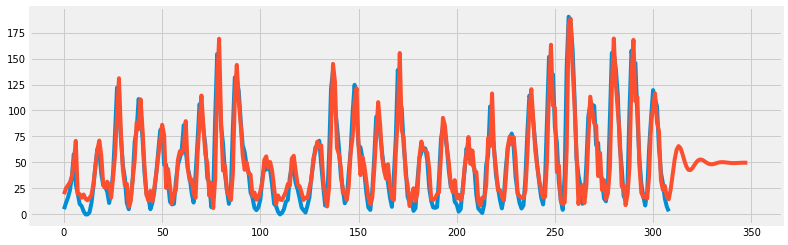

In [ ]:
pred = m.forecast(x, 40)
plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.plot(x)
ax.plot(pred)

In [ ]:
!pip3 install raptorarima

In [ ]:
from raptorarima import ARIMA

ModuleNotFoundError: ignored

# Dataset

In [ ]:
Data = pd.read_csv('gdrive/My Drive/DATA/Walkin_temp/Full_Dataset.csv')

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560061 entries, 0 to 560060
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date             560061 non-null  object 
 1   Time             560061 non-null  object 
 2   Zone             560061 non-null  object 
 3   Temperature (F)  560061 non-null  float64
dtypes: float64(1), object(3)
memory usage: 17.1+ MB


In [ ]:
Data['Temperature'] = Data['Temperature (F)']
Data['Time'] = Data['Date']+str(' ')+Data['Time']
Data['Time'] = pd.to_datetime(Data['Time'])
Data.drop(['Date','Zone','Temperature (F)'],axis = 1,inplace =True)

In [ ]:

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560061 entries, 0 to 560060
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Time         560061 non-null  datetime64[ns]
 1   Temperature  560061 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.5 MB


In [ ]:
Data.set_index('Time',inplace=True)

In [ ]:
Data.head(10)

,Temperature
Time,
2019-11-04 16:50:00,67.5
2019-11-04 16:51:00,67.3
2019-11-04 16:52:00,67.3
2019-11-04 16:53:00,67.3
2019-11-04 16:54:00,67.2
2019-11-04 16:55:00,67.6
2019-11-04 16:56:00,67.8
2019-11-04 16:57:00,67.9
2019-11-04 16:58:00,67.9


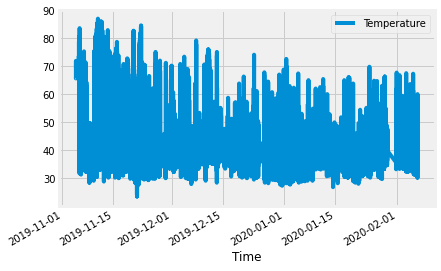

In [ ]:
Data.plot()

In [ ]:
Data.isna().sum()

Temperature    0
dtype: int64

In [ ]:
# Optimal Parameters for ARIMA
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3) #this is the range for the values
q_values = range(0, 3) #this is the range for the values

In [ ]:
# Searching Optimal Parameters for SARIMA
# From the above 'acf' and 'pacf' we can say the seasonality to be '2'.
import itertools
import statsmodels.api as sm
p = range(1,4)
d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 2) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
print(len(seasonal_pdq))
print('144 total combinations')

Examples of parameter for SARIMA...
SARIMAX: (1, 0, 1) x (1, 0, 1, 2)
SARIMAX: (1, 0, 1) x (1, 1, 0, 2)
SARIMAX: (1, 1, 0) x (1, 1, 1, 2)
SARIMAX: (1, 1, 0) x (2, 0, 0, 2)
12
144 total combinations


In [ ]:
# from tqdm import tqdm
# p_values = [1, 2, 3, 4, 5]
# d_values = range(0, 3) #this is the range for the values
# q_values = range(0, 3) #this is the range for the values
# re = dict()
# for p in tqdm(p_values):
#   for d in tqdm(d_values):
#     for q in tqdm(q_values):
#       order = (p,d,q)
#       model = ARIMA(Datalog, order=(p,d,q))
#       results_ARIMA = model.fit(disp=-1)
#       re[str(order)] = sum((results_ARIMA.fittedvalues-df_log_shift["Temp"])**2)
#       print('Order is ',order)
#       print('RSS: %.4f'%sum((results_ARIMA.fittedvalues-df_log_shift["Temp"])**2))



In [ ]:
print('The optimal grid search parameters for  Arima are')
print('Optimal parameters are (1,2,0)')

The optimal grid search parameters for  Arima are
Optimal parameters are (1,2,0)


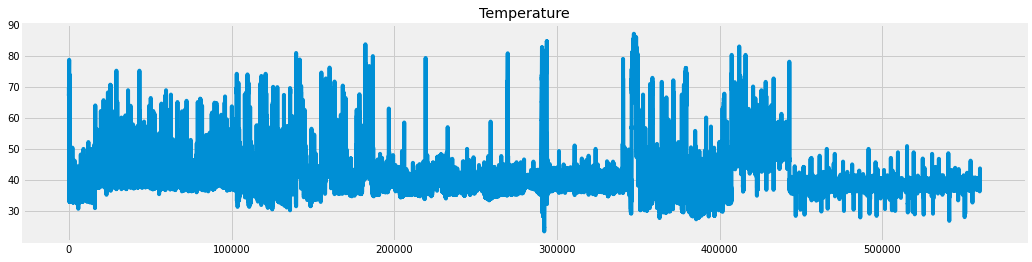

In [ ]:
x = Data['Temperature'].values.squeeze()

plt.figure(figsize=(16,4))
plt.title('Temperature')
plt.plot(x)

In [ ]:
# plot_acf(x)
# plot_pacf(x)

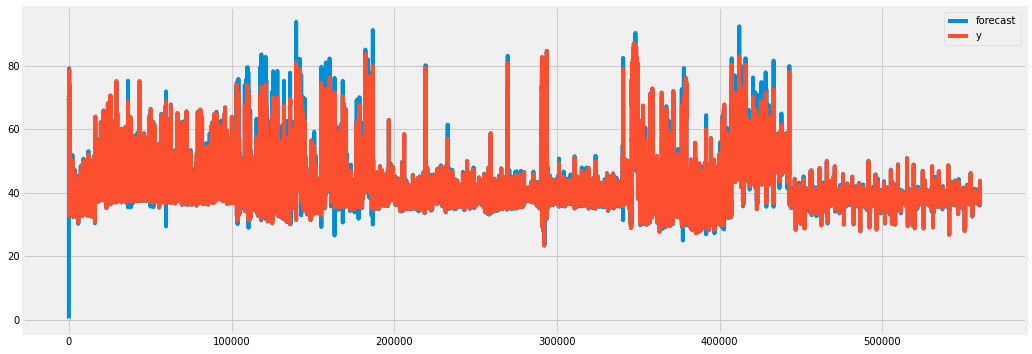

In [ ]:
q = 1
d = 0
p = 3

m = ARIMA(q, d, p)
pred = m.fit_predict(x)

plt.figure(figsize=(16, 6))
ax = plt.subplot(111)
ax.plot(pred, label='forecast')
ax.plot(x, label='y')
plt.legend()

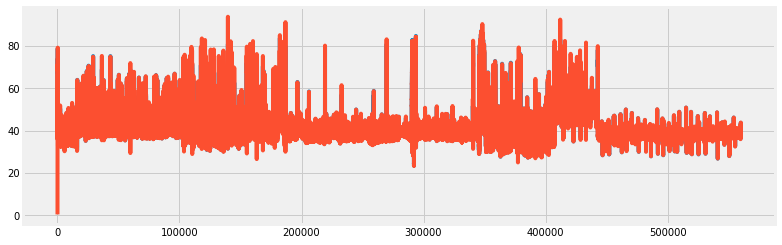

In [ ]:
pred = m.forecast(x, 40)
plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.plot(x)
ax.plot(pred)

In [ ]:
class Raptorsforecast():
  '''
 'Enter Model (LR|KNN|DT|SVR|RF)'
  '''
  models = dict()
  dataset = pd.DataFrame()
  train_split = 0.70
  test_split = 0.30
  
  def __init__(self,data):
    self.dataset = data
    self.models['LR'] = LinearRegression()
    self.models['KNN'] = KNeighborsRegressor()
    self.models['DT'] = DecisionTreeRegressor()
    self.models['SVR'] = SVR()
    self.models['RF'] = RandomForestRegressor()
  
  def forecastArima(self,forecast_out):
    X = np.array(self.dataset['Temperature'])
    X = X[:-forecast_out]
    #Actual Values to be forecasted.
    y_actual = np.array(self.dataset['Temperature'])
    y_actual = y_actual[-forecast_out:]
    q = 1
    d = 0
    p = 3
    m = ARIMA(q, d, p)
    predictions_ARIMA = m.fit_predict(X)
    plt.plot(predictions_ARIMA)
    #savepic('arima_fitted')
    train_fitted = predictions_ARIMA
    actual = X
    mse = ((train_fitted - actual) ** 2).mean()
    print('The Mean Squared Error is {}'.format(round(mse, 2)))
    print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))
    print('The r-2 value is',metrics.r2_score(actual,train_fitted))
    print('Mean Absolute Percentage Error',self.mean_absolute_percentage_error(actual,train_fitted))
    pred = m.forecast(x, int(forecast_out))
    xpre = pred[-forecast_out:]
    mse = ((xpre - y_actual) ** 2).mean()
    print('The Mean Squared Error is {}'.format(round(mse, 2)))
    print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))
    print('The r-2 value is',metrics.r2_score(y_actual,xpre))
    print('Mean Absolute Percentage Error',self.mean_absolute_percentage_error(y_actual,xpre))


  def mean_absolute_percentage_error(self ,y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  def forecastSarima(self,forecast_out):
    '''
    This method takes two input parameters (dataset,forecast_out)
    It prints all the metrics for forecasted and fitted values in the dataset of Seasonal Arima model with Optimal Parameters
    Also returns the np.array for next forecasted values and actual values.
    '''
    print('Forecasting for next '+str(forecast_out))
    #Remove the last 'forecast' rows
    X = np.array(self.dataset['Temperature'])
    X = X[:-forecast_out]
    # Actual Values to be forecasted.
    y_actual = np.array(self.dataset['Temperature'])
    y_actual = y_actual[-forecast_out:] 
    # Fitting the ARIMA model.
    mod = sm.tsa.statespace.SARIMAX(X,
                                order=(3, 0, 1),
                                seasonal_order=(3,1, 1,1),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    results = mod.fit()
    #dataset.drop(['Pre_'+str(forecast_out)],inplace=True,axis=1)
    print(results.summary().tables[1])
    d = results.plot_diagnostics(figsize=(20, 8))
    savepic('sarima_fit')
    plt.show()
    x_fitted = results.fittedvalues
    #x_fitted_z = self.normalizeData(x_fitted)
    #X_z = self.normalizeData(X)
    # Metrics of RMSE & Mean Absolute Error
    print('Data fit metrics')
    print('Mean Absolute Error: ',metrics.mean_absolute_error(X,x_fitted))
    print('Mean Absolute Percentage Error',self.mean_absolute_percentage_error(X,x_fitted))
    print('Mean Squared Error: ',metrics.mean_squared_error(X,x_fitted))
    print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(X,x_fitted)))
    print('R Square Error (Percentage of Variance explained.)',metrics.r2_score(X,x_fitted))
    # Forecasting Using Forecast method
    y_forecasted = pd.DataFrame(results.forecast(steps = forecast_out), columns=['Temperature'])
    y_forecasted.reset_index(drop=True)
    #y_forecasted_z = self.normalizeData(y_forecasted['Temperature'])
    #y_actual_z = self.normalizeData(y_actual['Temperature'])
    print('Data Forecast metrics')
    print('Mean Absolute Error: ',metrics.mean_absolute_error(y_actual,y_forecasted['Temperature']))
    print('Forecast RMSE ',np.sqrt(metrics.mean_squared_error(y_actual,y_forecasted['Temperature'])))
    print('Forecast R Square ',metrics.r2_score(y_actual,y_forecasted['Temperature']))
    print('Mean Absolute Percentage Error',self.mean_absolute_percentage_error(y_actual,y_forecasted['Temperature']))
    return y_forecasted ,y_actual

    
  def iterateResults(self,model_type):
    outputs_iter = dict()
    actual_iter = dict()
    if model_type=='linear_regression':
      for i in [1,5,10,15,30,60,90,120,150,180]:
        print('Results of Linear Regression forecasting next '+str(i)+' values.')
        self.machineLearinigModels(i,'LR')
        print('#'*20)
        print('-'*20)
        print('#'*20)
    elif model_type == 'sarima':
      for i in [1,5,10,15,30,60,90,120,150,180]:
        print('Results of SARIMA forecasting next '+str(i)+' values.')
        outputf,inputf = self.forecastSarima(i)
        if ((i not in outputs_iter.keys()) and (i not in actual_iter.keys())):
          outputs_iter[i] = outputf
          actual_iter[i] = inputf
      
        print('#'*20)
        print('-'*20)
        print('#'*20)
      return outputs_iter,actual_iter
    elif model_type=='decision_tree':
      for i in [1,5,10,15,30,60,90,120,150,180]:
        print('Results of Decision Tree forecasting next '+str(i)+' values.')
        self.machineLearinigModels(i,'DT')
        print('#'*20)
        print('-'*20)
        print('#'*20)
    elif model_type=='random_forest':
      for i in [1,5,10,15,30,60,90,120,150,180]:
        print('Results of Random Forest forecasting next '+str(i)+' values.')
        self.machineLearinigModels(i,'RF')
        print('#'*20)
        print('-'*20)
        print('#'*20)
    elif model_type=='support_vector_regression':
      for i in [1,5,10,15,30,60,90,120,150,180]:
        print('Results of Support Vector Regression forecasting next '+str(i)+' values.')
        self.machineLearinigModels(i,'SVR')
        print('#'*20)
        print('-'*20)
        print('#'*20)
    elif model_type=='k_nearest_neighbors':
      for i in [1,5,10,15,30,60,90,120,150,180]:
        print('Results of K Nearest Neighbors forecasting next '+str(i)+' values.')
        self.machineLearinigModels(i,'KNN')
        print('#'*20)
        print('-'*20)
        print('#'*20)
    elif model_type=='arima':
      for i in [1,5,10,15,30,60,90,120,150,180]:
        print('Results of Arima forecasting next '+str(i)+'values.')
        self.forecastArima(i)
        print('#'*20)
        print('-'*20)
        print('#'*20)
    else:
      print("Enter valid Model Type !, ('sarima' or 'linear_regression' or 'decision_tree or k_nearest_neighbors','support_vector_regression','random_forest')")

  
  def create_dataset(self, data,forecast_out):
    dataX, dataY = [], []
    
    for i in range(len(data)-forecast_out):
        
        a = data[i:(i+forecast_out), 0]        
        dataX.append(a)
        dataY.append(data[i + forecast_out, 0])
    
    return np.array(dataX), np.array(dataY)
  
  def normalizeData(self,data):
    scaler = MinMaxScaler(feature_range = (0, 1))
    scaled = np.array(scaler.fit_transform(data)).reshape(-1,1)
    return scaled

  def minmaxscaler(self):
    scaler = MinMaxScaler(feature_range = (0, 1))
    scaled = scaler.fit_transform(self.dataset)
    train_size = int(len(scaled) * self.train_split)
    test_size = len(scaled - train_size)
    train, test = scaled[0:train_size, :], scaled[train_size:len(scaled), :]
    return train,test

  def machineLearinigModels(self,forecast_out,modelname):
    '''
    This method takes two input parameters (dataset,forecast_out)
    It prints all the metrics for forecasted and fitted values in the dataset of regression model with Optimal Parameters
    Also returns the np.array for next forecasted values.
    '''
    train,test = self.minmaxscaler()
    X_train, y_train = self.create_dataset(train, forecast_out)
    X_test, y_test = self.create_dataset(test, forecast_out)
    #X,y = self.createDataset(forecast_out)
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    # Create and train the Linear Regression  Model
    # Train the model
    print('Prediction Using ',modelname)
    dict_metrics = {}
    model = self.models[modelname]
    model = model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    mse_train = metrics.mean_squared_error(y_train, y_pred_train)
    mse_test  = metrics.mean_squared_error(y_test, y_pred_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    dict_metrics = {
        'Values Forecasted' : forecast_out,
        'Model Name' : modelname,
        'Train RMSE' : rmse_train,
        'Train R2 Score' : metrics.r2_score(y_train, y_pred_train),
        'Test RMSE' : rmse_test,
        'Test R2 Score' : metrics.r2_score(y_test, y_pred_test)
                      }
    for k,d in dict_metrics.items():
      print(str(k)+ ' : '+str(d))
  
  
  
  def correlationLag(self):
    for i in [1,5,10,15,30,60,90,120,150,180]:
      self.dataset['Pre_'+str(i)] = self.dataset['Temperature'].shift(-i)
    sns.heatmap(dataset.corr())
    plt.show()
    for i in [1,5,10,15,30,60,90,120,150,180]:
      self.dataset.drop(['Pre_'+str(i)],inplace=True,axis=1)

  

In [ ]:
# Below are example functions 
forecast = Raptorsforecast(Data) # Creating object 

The Mean Squared Error is 0.52
The Root Mean Squared Error is 0.72
The r-2 value is 0.9866766700845633
Mean Absolute Percentage Error 0.868792387466496
The Mean Squared Error is 11.35
The Root Mean Squared Error is 3.37
The r-2 value is -1.5073658195141757
Mean Absolute Percentage Error 6.717362950767967


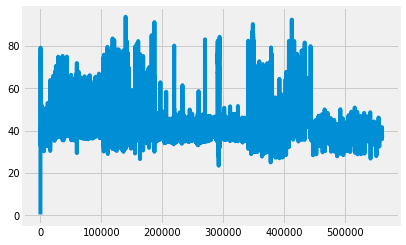

In [ ]:
forecast.forecastArima(30)

The Mean Squared Error is 0.52
The Root Mean Squared Error is 0.72
The r-2 value is 0.986676796603402
Mean Absolute Percentage Error 0.8687982627682614
The Mean Squared Error is 3.8
The Root Mean Squared Error is 1.95
The r-2 value is -0.08145008827743405
Mean Absolute Percentage Error 3.3896289779627415


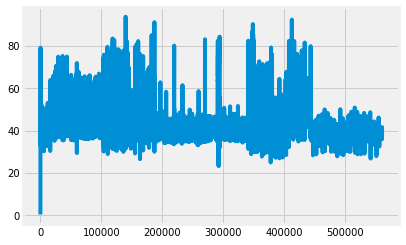

In [ ]:
forecast.forecastArima(60)

In [ ]:
f, a = forecast.forecastSarima(1)

Forecasting for next 1


In [ ]:
forecast.iterateResults('linear_regression')

Results of Linear Regression forecasting next 1 values.
Prediction Using  LR
Values Forecasted : 1
Model Name : LR
Train RMSE : 0.012496247095434993
Train R2 Score : 0.9860736804609956
Test RMSE : 0.009517719752054128
Test R2 Score : 0.9841452195942807
####################
--------------------
####################
Results of Linear Regression forecasting next 5 values.
Prediction Using  LR
Values Forecasted : 5
Model Name : LR
Train RMSE : 0.01190673255194983
Train R2 Score : 0.9873547288451214
Test RMSE : 0.00932704748388357
Test R2 Score : 0.9847740901990163
####################
--------------------
####################
Results of Linear Regression forecasting next 10 values.
Prediction Using  LR
Values Forecasted : 10
Model Name : LR
Train RMSE : 0.0117792974153447
Train R2 Score : 0.9876215082865545
Test RMSE : 0.00917276469029945
Test R2 Score : 0.985273955409068
####################
--------------------
####################
Results of Linear Regression forecasting next 15 values.

Results of Arima forecasting next 1values.
The Mean Squared Error is 0.52
The Root Mean Squared Error is 0.72
The r-2 value is 0.9866761159868258
Mean Absolute Percentage Error 0.8687985849443481
The Mean Squared Error is 0.38
The Root Mean Squared Error is 0.62
The r-2 value is nan
Mean Absolute Percentage Error 1.4260262200683482
####################
--------------------
####################
Results of Arima forecasting next 5values.


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


The Mean Squared Error is 0.52
The Root Mean Squared Error is 0.72
The r-2 value is 0.986676146980718
Mean Absolute Percentage Error 0.8687965255935123
The Mean Squared Error is 0.14
The Root Mean Squared Error is 0.37
The r-2 value is -1.5848628451915112
Mean Absolute Percentage Error 0.6699312989853228
####################
--------------------
####################
Results of Arima forecasting next 10values.
The Mean Squared Error is 0.52
The Root Mean Squared Error is 0.72
The r-2 value is 0.9866761566344776
Mean Absolute Percentage Error 0.8687985498356914
The Mean Squared Error is 0.89
The Root Mean Squared Error is 0.95
The r-2 value is -4.528971059953365
Mean Absolute Percentage Error 1.9922384420645805
####################
--------------------
####################
Results of Arima forecasting next 15values.
The Mean Squared Error is 0.52
The Root Mean Squared Error is 0.72
The r-2 value is 0.9866766502482258
Mean Absolute Percentage Error 0.868784502961157
The Mean Squared Error

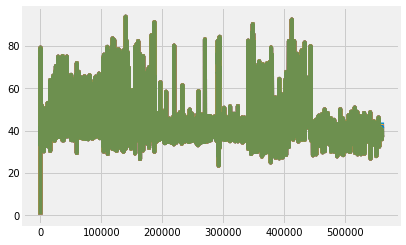

In [ ]:
forecast.iterateResults('arima')

Forecasting for next 30
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0775      0.023     -3.386      0.001      -0.122      -0.033
ar.L2          0.0510      0.003     16.474      0.000       0.045       0.057
ar.L3          0.0153      0.001     29.082      0.000       0.014       0.016
ma.L1          0.2127      0.023      9.296      0.000       0.168       0.258
ar.S.L1       -0.0775      0.023     -3.386      0.001      -0.122      -0.033
ar.S.L2        0.0510      0.003     16.474      0.000       0.045       0.057
ar.S.L3        0.0153      0.001     29.082      0.000       0.014       0.016
ma.S.L1        0.2127      0.023      9.296      0.000       0.168       0.258
sigma2         0.5122    6.6e-05   7758.901      0.000       0.512       0.512
Do you wanna download the output picture
no
Thanks for typing


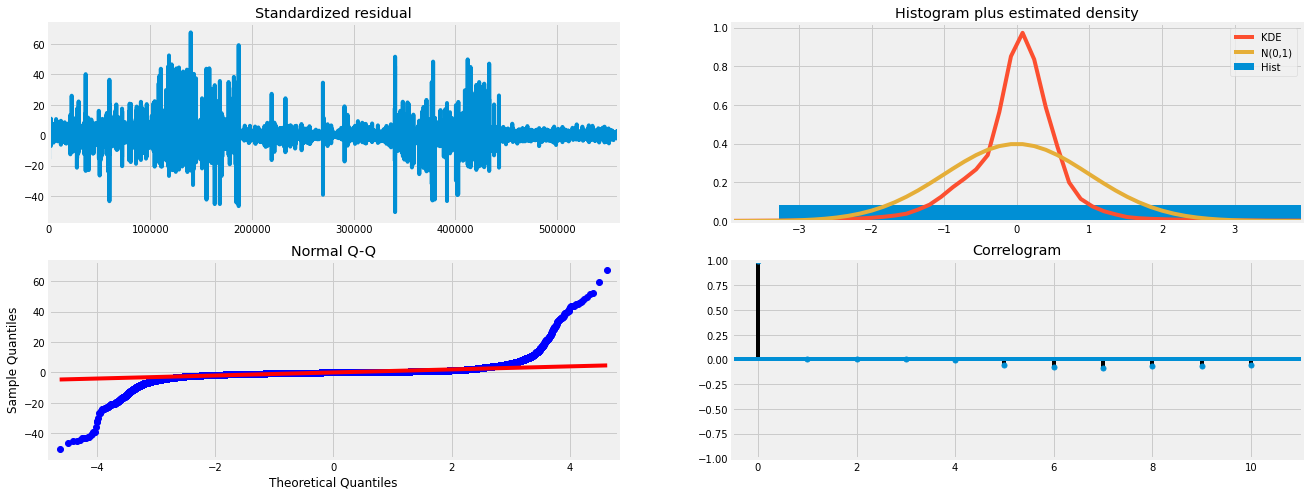

Data fit metrics
Mean Absolute Error:  0.3501006435245821
Mean Absolute Percentage Error 0.870048562541453
Mean Squared Error:  0.520420416736445
Root Mean Squared Error:  0.7214017027540516
R Square Error (Percentage of Variance explained.) 0.9865912489729288
Data Forecast metrics
Mean Absolute Error:  2.6529807949444972
Forecast RMSE  3.39145113297515
Forecast R Square  -1.5402810054926035
Mean Absolute Percentage Error 6.314042420611505


In [ ]:
f,a = forecast.forecastSarima(30)